In [1]:
import pandas as pd
data = pd.read_csv('train_subset.csv')
input_path = 'train_images/'
data.head(3)

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [2]:
import tile_extraction_v2

image =tile_extraction_v2.read_image(input_path + data.image_id[0] + '.tiff')

1


(-0.5, 27647.5, 29439.5, -0.5)

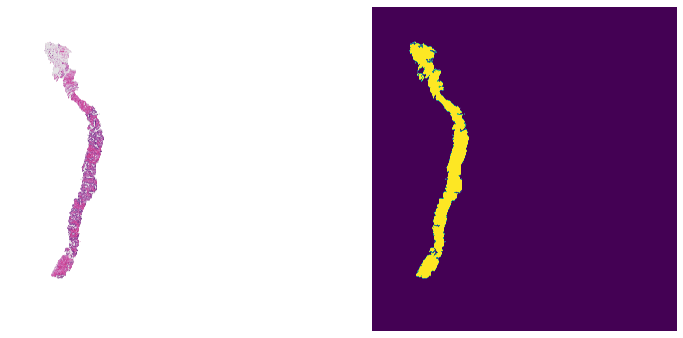

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

mask = tile_extraction_v2.mask_tissue(image)

axes[0].imshow(image)
axes[1].imshow(mask)
axes[0].axis('off')
axes[1].axis('off')

In [4]:
coords = tile_extraction_v2.compute_coords(image, precompute=True)
print("    val  y   x\n", coords[:10])

image, coords = tile_extraction_v2.compute_coords(image, precompute=False)
print("    val  y   x\n", coords[:10])

    val  y   x
 [[ 206 3208 3925]
 [ 206 3464 3468]
 [ 204 3464 3724]
 [ 204 3464 3980]
 [ 207 3464 4236]
 [ 193 3464 4520]
 [ 200 3464 4776]
 [ 204 3720 3476]
 [ 204 3720 3732]
 [ 203 3720 3988]]
    val  y   x
 [[ 206 3464 4181]
 [ 206 3720 3724]
 [ 204 3720 3980]
 [ 204 3720 4236]
 [ 207 3720 4492]
 [ 193 3720 4776]
 [ 200 3720 5032]
 [ 204 3976 3732]
 [ 204 3976 3988]
 [ 203 3976 4244]]


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:>]


KeyboardInterrupt: 

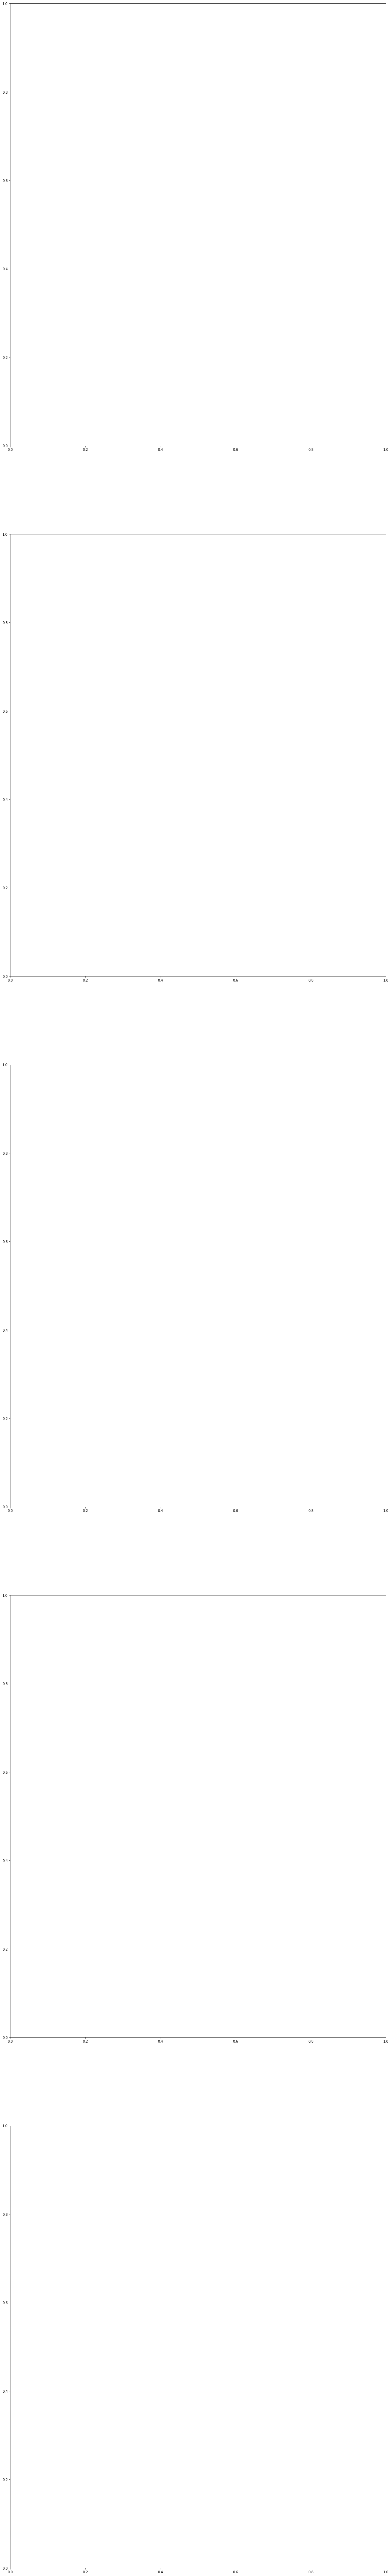

In [5]:
import cv2

fig, axes = plt.subplots(5, 1, figsize=(20, 140))
print(axes)
patch_size = 256

for i, ax in enumerate(axes.reshape(-1)):
    image_path = input_path + data.image_id[i+50] + '.tiff'
    image = tile_extraction_v2.read_image(image_path, 1)
    
    coords = tile_extraction_v2.compute_coords(image,
                            patch_size=patch_size,
                            precompute=True,
                            min_patch_info=0.35,
                            min_axis_info=0.35,
                            min_consec_axis_info=0.35,
                            min_decimal_keep=0.7)
    
    # sort coords (high info -> low info)
    coords = sorted(coords, key= lambda x: x[0], reverse=False)
    for (v, y, x) in coords:
        end_point = (x, y)
        start_point = (x+patch_size, y+patch_size)
        image = cv2.rectangle(image, start_point, end_point, 2, 14)
    
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(
        "num patches = "+str(len(coords))+", isup grade = "+str(data.isup_grade[i+50]),
        fontsize=20)

plt.subplots_adjust(hspace=0.05, wspace=0.05)